In [1]:
import joblib, pandas as pd
import matplotlib.pyplot as plt
from xgboost import plot_importance

In [2]:
data_live= pd.read_csv('../data/features.live.csv').set_index('id')
data_live

,age-group,education-num,capitalgain,capitalloss,hoursperweek,education,workclass_state-gov,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,...,relationship_husband,relationship_wife,relationship_other-relative,race_white,race_black,race_asian-pac-islander,race_other,race_amer-indian-eskimo,sex_male,sex_female
id,,,,,,,,,,,,,,,,,,,,,
6111,-1.529352,-1.323826,-0.327581,-0.231881,-0.051599,9.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
11214,-0.730900,-0.553107,-0.327581,-0.231881,-1.197554,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5554,1.664458,-0.553107,-0.327581,-0.231881,1.094355,4.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
25131,0.067553,1.373691,-0.327581,-0.231881,-0.051599,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
14324,0.866005,-0.553107,-0.327581,-0.231881,-0.051599,4.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,1.664458,0.988332,-0.327581,-0.231881,1.094355,3.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8375,1.664458,-0.553107,-0.327581,-0.231881,2.240310,4.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13888,-0.730900,-1.323826,-0.327581,-0.231881,-1.197554,9.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
model = joblib.load("../model/modelXGB.joblib")

In [4]:
data_live_predictions = pd.DataFrame(
    data = model.predict(data_live),
    index = data_live.index,
    columns = ['prediction'],
)
data_live_predictions

,prediction
id,
6111,0
11214,0
5554,1
25131,1
14324,1
...,...
25998,1
8375,0
13888,0


<Figure size 1000x600 with 0 Axes>

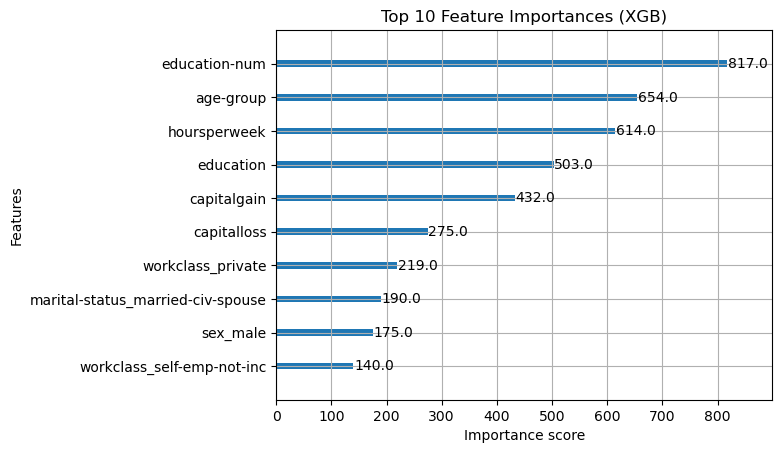

In [5]:
plt.figure(figsize=(10,6))
plot_importance(model, max_num_features=10)
plt.title("Top 10 Feature Importances (XGB)")
plt.show()

In [6]:
data_live_predictions.reset_index(inplace=True)
data_live_predictions.to_csv('../results/XGB_predictions.live.csv',index=False)